In [44]:
import sqlite3
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
# Create your connection.
cnx = sqlite3.connect('company.db')

df_client = pd.read_sql_query("SELECT * FROM clients", cnx)
df_transactions = pd.read_sql_query("SELECT * FROM Transactions", cnx)
df_campaigns = pd.read_sql_query("SELECT * FROM Campaigns", cnx)

df_cl = pd.read_sql_query("SELECT * FROM clients", cnx)
df_tr = pd.read_sql_query("SELECT * FROM Transactions", cnx)
df_cg = pd.read_sql_query("SELECT * FROM Campaigns", cnx)

In [45]:
df_client.head()

,account,type,residence,date_joined,indication_coupon,first_deposit_amount,first_deposit_date,first_transaction_amount,first_transaction_date,balance_amount
0,5019,type_6,ua,2018-06-18,308,9090.91,2018-06-18,NaN,None,9090.91
1,3655,type_6,ve,2017-09-04,83,9090.91,2017-09-04,0.120000,2017-09-04,-191834.62
2,2809,type_6,br,2017-01-16,308,9090.91,2017-01-16,0.205556,2017-01-16,-3679886.14
3,3876,type_6,mm,2017-11-01,232,9090.91,2017-11-01,NaN,None,-90909.09
4,4973,type_6,lk,2018-06-09,308,9090.91,2018-06-09,0.110000,2018-06-11,8974.12


In [46]:
df_transactions.head()

,transaction_date,account,total_buy,total_sell,total_deposits,total_withdrawals,count_contracts,count_deposits,count_withdrawals
0,2018-05-25,1093,NaN,NaN,NaN,3.15,0,0,1
1,2017-03-18,1093,7.50,6.50,100.0,NaN,72,1,0
2,2017-03-17,1093,48.63,38.51,1000.0,NaN,93,2,0
3,2018-12-10,2622,36.29,32.99,NaN,NaN,44,0,0
4,2018-12-09,2622,101.19,102.56,NaN,NaN,76,0,0


In [47]:
df_campaigns.head()

,start_date,end_date,total_spend,country
0,2017-01-03,2017-01-04,9935.67,
1,2017-01-04,2017-01-06,17696.41,id
2,2017-01-08,2017-01-12,22541.26,in
3,2017-02-13,2017-02-18,745.89,ng
4,2017-05-02,2017-05-03,15338.78,id


# Data Cleaning

## Clients table

Removing blank residencies 

In [48]:

df_client.drop(df_client[df_client["residence"]==""].index, inplace=True)

In [49]:
df_client.head()

,account,type,residence,date_joined,indication_coupon,first_deposit_amount,first_deposit_date,first_transaction_amount,first_transaction_date,balance_amount
0,5019,type_6,ua,2018-06-18,308,9090.91,2018-06-18,NaN,None,9090.91
1,3655,type_6,ve,2017-09-04,83,9090.91,2017-09-04,0.120000,2017-09-04,-191834.62
2,2809,type_6,br,2017-01-16,308,9090.91,2017-01-16,0.205556,2017-01-16,-3679886.14
3,3876,type_6,mm,2017-11-01,232,9090.91,2017-11-01,NaN,None,-90909.09
4,4973,type_6,lk,2018-06-09,308,9090.91,2018-06-09,0.110000,2018-06-11,8974.12


In [100]:
df_client["first_deposit_amount"].fillna(0, inplace=True)
df_client[df_client["first_deposit_amount"]==0].head()

,account,type,residence,date_joined,indication_coupon,first_deposit_amount,first_deposit_date,first_transaction_amount,first_transaction_date,balance_amount
7,1748,type_1,id,2018-01-27,308,0.0,2019-04-19,0.0,2019-04-19,0.0
9,1848,type_1,ng,2018-03-01,308,0.0,2019-04-19,0.0,2019-04-19,0.0
10,2469,type_1,id,2018-10-07,308,0.0,2019-04-19,0.0,2019-04-19,0.0
15,2221,type_1,id,2018-07-10,308,0.0,2019-04-19,0.0,2019-04-19,0.0
26,1678,type_1,id,2018-01-04,308,0.0,2019-04-19,0.0,2019-04-19,0.0


In [101]:
from datetime import date
today_val = date.today()
df_client["first_deposit_date"].fillna(today_val, inplace=True)
df_client[df_client["first_deposit_date"]==today_val].head()

,account,type,residence,date_joined,indication_coupon,first_deposit_amount,first_deposit_date,first_transaction_amount,first_transaction_date,balance_amount
7,1748,type_1,id,2018-01-27,308,0.0,2019-04-19,0.0,2019-04-19,0.0
9,1848,type_1,ng,2018-03-01,308,0.0,2019-04-19,0.0,2019-04-19,0.0
10,2469,type_1,id,2018-10-07,308,0.0,2019-04-19,0.0,2019-04-19,0.0
15,2221,type_1,id,2018-07-10,308,0.0,2019-04-19,0.0,2019-04-19,0.0
26,1678,type_1,id,2018-01-04,308,0.0,2019-04-19,0.0,2019-04-19,0.0


In [102]:
df_client["first_transaction_amount"].fillna(0, inplace=True)
df_client["balance_amount"].fillna(0, inplace=True)
df_client["first_transaction_date"].fillna(today_val, inplace=True)

NaN dates and amounts filled! Dates with today and amounts with 0. 

There is no NaN value in Clients Database.

## Transactions table

In [56]:
print(df_transactions.shape)
df_transactions.head()

(36747, 9)


,transaction_date,account,total_buy,total_sell,total_deposits,total_withdrawals,count_contracts,count_deposits,count_withdrawals
0,2018-05-25,1093,NaN,NaN,NaN,3.15,0,0,1
1,2017-03-18,1093,7.50,6.50,100.0,NaN,72,1,0
2,2017-03-17,1093,48.63,38.51,1000.0,NaN,93,2,0
3,2018-12-10,2622,36.29,32.99,NaN,NaN,44,0,0
4,2018-12-09,2622,101.19,102.56,NaN,NaN,76,0,0


In [57]:
for column in df_transactions.columns:
    col_na_len = len(df_transactions[df_transactions[column].isna()==True])
    if col_na_len:
        print(column + " has " + str(col_na_len) + " NaN value")

total_buy has 3578 NaN value
total_sell has 3826 NaN value
total_deposits has 28505 NaN value
total_withdrawals has 20062 NaN value


Drop transactions with No Data (321 cols)

In [58]:
df_transactions[(df_transactions["total_buy"].isna()==True)] \
    [(df_transactions["total_sell"].isna()==True)]\
    [(df_transactions["total_deposits"].isna()==True)]\
    [(df_transactions["total_withdrawals"].isna()==True)].head()

,transaction_date,account,total_buy,total_sell,total_deposits,total_withdrawals,count_contracts,count_deposits,count_withdrawals
95,2018-10-22,1806,NaN,NaN,NaN,NaN,0,0,0
354,2017-09-09,1003,NaN,NaN,NaN,NaN,0,0,0
355,2017-09-08,1003,NaN,NaN,NaN,NaN,0,0,0
518,2018-02-08,1007,NaN,NaN,NaN,NaN,0,0,0
521,2018-02-05,1007,NaN,NaN,NaN,NaN,0,0,0


In [59]:
df_transactions.drop(df_transactions[(df_transactions["total_buy"].isna()==True)] \
    [(df_transactions["total_sell"].isna()==True)]\
    [(df_transactions["total_deposits"].isna()==True)]\
    [(df_transactions["total_withdrawals"].isna()==True)].index, inplace=True)


Fill other NaN values with 0.

In [60]:
df_transactions["total_buy"].fillna(0, inplace=True)
df_transactions["total_sell"].fillna(0, inplace=True)
df_transactions["total_deposits"].fillna(0, inplace=True)
df_transactions["total_withdrawals"].fillna(0, inplace=True)

In [61]:
df_transactions.shape

(36426, 9)

As in mentioned in the question, there is no need for sell, deposit and withdrawals in this example. So there is no need to last 6 columns and respective rows (removing rows with no valuable data). 

In [62]:
df_transactions.drop(["total_sell","total_deposits","total_withdrawals",
                      "count_contracts","count_deposits","count_withdrawals"], axis=1, inplace=True)

In [63]:
df_transactions.drop(df_transactions[(df_transactions["total_buy"]==0)].index, inplace=True)
print(df_transactions.shape)
df_transactions.head()

(33169, 3)


,transaction_date,account,total_buy
1,2017-03-18,1093,7.50
2,2017-03-17,1093,48.63
3,2018-12-10,2622,36.29
4,2018-12-09,2622,101.19
5,2018-12-08,2622,2.04


## Campaigns table

In [64]:
df_campaigns.head()

,start_date,end_date,total_spend,country
0,2017-01-03,2017-01-04,9935.67,
1,2017-01-04,2017-01-06,17696.41,id
2,2017-01-08,2017-01-12,22541.26,in
3,2017-02-13,2017-02-18,745.89,ng
4,2017-05-02,2017-05-03,15338.78,id


In [65]:
for column in df_campaigns.columns:
    col_na_len = len(df_campaigns[df_campaigns[column].isna()==True])
    if col_na_len:
        print(column + " has " + str(col_na_len) + " NaN value")

No Nan Value

place a notation "gl" for global campains

In [66]:
df_campaigns["country"].replace("", "gl", inplace=True)
df_campaigns["country"].value_counts()

id    14
ng     4
br     4
ru     3
ua     2
gl     2
gh     2
in     1
ph     1
ca     1
mg     1
gb     1
za     1
de     1
ma     1
co     1
it     1
ie     1
py     1
Name: country, dtype: int64

## Aggrigation

In [68]:
df_transactions.head()

,transaction_date,account,total_buy
1,2017-03-18,1093,7.50
2,2017-03-17,1093,48.63
3,2018-12-10,2622,36.29
4,2018-12-09,2622,101.19
5,2018-12-08,2622,2.04


In [69]:
df = pd.DataFrame()
df["transaction_date"] = df_transactions["transaction_date"]
df["account"] = df_transactions["account"]
df["total_buy"] = df_transactions["total_buy"]
df["residence"] = ""
for index , row in df.iterrows():
    val_temp = df_transactions.at[index, "account"]
    try:
        df.set_value(index, 'residence', pd.factorize(df_client[df_client["account"]==val_temp]['residence'])[1][0])
    except:
        df.set_value(index, 'residence', "gl")


In [70]:
pd.factorize(df_client[df_client["account"]==1093]['residence'])[1][0]
#df_client["residence"][0]

'ru'

In [71]:
df.sort_values("transaction_date").head()

,transaction_date,account,total_buy,residence
366,2017-01-02,1003,6.43,ru
13328,2017-01-02,2758,2730.00,ng
13315,2017-01-03,2753,12.76,br
13327,2017-01-03,2758,12.00,ng
13330,2017-01-03,2759,6.40,id


In [72]:
df["residence"].unique()

array(['ru', 'ng', 'id', 'br', 'co', 'nz', 'mx', 'vn', 'mg', 'ua', 'ke',
       'ec', 'za', 'hu', 'ca', 'cl', 'th', 'by', 'lk', 'zw', 'in', 'tr',
       'gh', 'kr', 'ma', 'mm', 'so', 'ch', 'bo', 'ar', 'pk', 'kz', 'ph',
       'au', 'lb', 'ag', 'sg', 'cm', 'bd', 'dz', 'sa', 'tn', 'sv', 'eg',
       've', 'tz', 'sz', 'ae', 'pe', 'ls', 'fr', 'cz', 'gb', 'es', 'it',
       'ie', 'ro', 'pt', 'se', 'cy', 'nl', 'be', 'pl', 'lv', 'de', 'md',
       'cn', 'bn', 'ax', 'hr', 'at', 'fi', 'uz', 'sk', 'si', 'no', 'dk',
       'ci', 'gr', 'tw', 'ky', 'lt', 'ge', 'mz', 'do', 'sr', 'mu', 'gl',
       'az', 'pa', 'mk', 'jm', 'af', 'bj', 'tm', 'al', 'am', 'ao', 'kw',
       'zm', 'bh', 'gi', 'ug', 'bw', 'bg', 'lc', 'iq', 'gt', 'ee', 'sy',
       'bf', 'rs', 'jp'], dtype=object)

In [73]:
val_start = df_campaigns.at[1, "start_date"]
val_end = df_campaigns.at[1, "end_date"]
val_c = df_campaigns.at[1, "country"]
df[(df["transaction_date"]>=val_start) & (df["transaction_date"]<=val_end) & (df["residence"]==val_c)]["total_buy"].sum()
#df[(df["transaction_date"]>=val_temp) and (
#             df["transaction_date"]<=val_end)]

1426.5

In [74]:

df_campaigns["gain"] = 0.0
for index , row in df_campaigns.iterrows():
    val_start = df_campaigns.at[index, "start_date"]
    val_end = df_campaigns.at[index, "end_date"]
    val_c = df_campaigns.at[index, "country"]
    if val_c != "gl":
        try:
            df_campaigns.set_value(index, 'gain', df[(df["transaction_date"]>=val_start) & 
                                                (df["transaction_date"]<=val_end) & 
                                                (df["residence"]==val_c)]["total_buy"].sum())
        except:
            df_campaigns.set_value(index, 'gain', 0.0)
    else:
        try:
            df_campaigns.set_value(index, 'gain', df[(df["transaction_date"]>=val_start) & 
                                                (df["transaction_date"]<=val_end)]["total_buy"].sum())
        except:
            df_campaigns.set_value(index, 'gain', 0.0)
df_campaigns.head()

,start_date,end_date,total_spend,country,gain
0,2017-01-03,2017-01-04,9935.67,gl,21725.05
1,2017-01-04,2017-01-06,17696.41,id,1426.50
2,2017-01-08,2017-01-12,22541.26,in,164.89
3,2017-02-13,2017-02-18,745.89,ng,23532.92
4,2017-05-02,2017-05-03,15338.78,id,103699.69


In [75]:
import datetime
from datetime import timedelta
date_str = '2017-02-12' # The date - 29 Dec 2017
format_str = '%Y-%m-%d' # The format
date_max = datetime.datetime.strptime(df["transaction_date"].max(), format_str)
date_min = datetime.datetime.strptime(df["transaction_date"].min(), format_str)
print((date_max-date_min).days)
date_min.date()

707


datetime.date(2017, 1, 2)

In [76]:
"""df_day = pd.DataFrame()
date_min = datetime.datetime.strptime(df["transaction_date"].min(), format_str)
for i in range((date_max-date_min).days):
    date_val = date_min.date()+ timedelta(days=i)
    df_day.set_value(i, 'day', date_val)
    for j in df_campaigns["country"].unique():
        if j != "gl":
            try:
                df_day.set_value(i, 'gain '+j, df[(df["transaction_date"]==str(date_val)) & 
                                                    (df["residence"]==j)]["total_buy"].sum())
            except:
                df_day.set_value(i, 'gain '+j, 0.0)
        else:
            try:
                df_day.set_value(i, 'gain '+j, df[(df["transaction_date"]==str(date_val))]["total_buy"].sum())
            except:
                df_day.set_value(i, 'gain '+j, 0.0)
    
df_day.head()"""
    

'df_day = pd.DataFrame()\ndate_min = datetime.datetime.strptime(df["transaction_date"].min(), format_str)\nfor i in range((date_max-date_min).days):\n    date_val = date_min.date()+ timedelta(days=i)\n    df_day.set_value(i, \'day\', date_val)\n    for j in df_campaigns["country"].unique():\n        if j != "gl":\n            try:\n                df_day.set_value(i, \'gain \'+j, df[(df["transaction_date"]==str(date_val)) & \n                                                    (df["residence"]==j)]["total_buy"].sum())\n            except:\n                df_day.set_value(i, \'gain \'+j, 0.0)\n        else:\n            try:\n                df_day.set_value(i, \'gain \'+j, df[(df["transaction_date"]==str(date_val))]["total_buy"].sum())\n            except:\n                df_day.set_value(i, \'gain \'+j, 0.0)\n    \ndf_day.head()'

As we see in this table, therre are many missing value and it seems the cause is, the data is selective and not all transaction data

In [77]:
df[(df["residence"]=="id") & (df["transaction_date"]<="2017-01-06") & (df["transaction_date"]>="2017-01-04")]["total_buy"].sum()
    
    

1426.5

In [105]:

df_campaigns["benefit"] = df_campaigns["gain"]/(df_campaigns["total_spend"]+df_campaigns["gain"])

for i in df_campaigns.iterrows():
    if i[1]["country"] != "gl":
        gained_val = 0
        camp_days = 0
        date_s = datetime.datetime.strptime(i[1]["start_date"], format_str)
        date_e = datetime.datetime.strptime(i[1]["end_date"], format_str)
        for j in df_campaigns[(df_campaigns["country"]==i[1]["country"]) ].iterrows():
            gained_val +=  j[1]["gain"]
            date_st = datetime.datetime.strptime(j[1]["start_date"], format_str)
            date_et = datetime.datetime.strptime(j[1]["end_date"], format_str)
            camp_days += (date_et-date_st).days+1
        notCampBen = ((df[(df["residence"]==i[1]["country"])]["total_buy"].sum()-
                                                   gained_val)/((date_max-date_min).days+1-camp_days))
        df_campaigns.set_value(i[0], 'notCampBen', notCampBen )
        gainPerDay = i[1]["gain"]/((date_e-date_s).days+1)
        df_campaigns.set_value(i[0], 'gainPerDay', gainPerDay)
        spendPerDay = i[1]["total_spend"]/((date_e-date_s).days+1)
        df_campaigns.set_value(i[0], 'spendPerDay', spendPerDay)
        benefitPerDay = (i[1]["gain"]-i[1]["total_spend"])/((date_e-date_s).days+1)
        df_campaigns.set_value(i[0], 'benefitPerDay', benefitPerDay)
        aggBenefit = benefitPerDay-notCampBen
        df_campaigns.set_value(i[0], 'aggBenefit', aggBenefit)
        aggBenefitNorm = aggBenefit/spendPerDay
        df_campaigns.set_value(i[0], 'aggBenefitNorm', aggBenefitNorm)
        df_campaigns.set_value(i[0], 'camp_days', camp_days)
    else:
        
        
        gained_val = 0
        camp_days = 0
        date_s = datetime.datetime.strptime(i[1]["start_date"], format_str)
        date_e = datetime.datetime.strptime(i[1]["end_date"], format_str)
        tot_gained = df_campaigns["gain"].sum()
        tot_day = 0
        for j in df_campaigns[(df_campaigns["country"]==i[1]["country"])].iterrows():
            gained_val +=  j[1]["gain"]
            date_st = datetime.datetime.strptime(j[1]["start_date"], format_str)
            date_et = datetime.datetime.strptime(j[1]["end_date"], format_str)
            camp_days += (date_et-date_st).days+1
        notCampBen = ((df["total_buy"].sum())/((date_max-date_min).days+1))
        df_campaigns.set_value(i[0], 'notCampBen', notCampBen )
        gainPerDay = i[1]["gain"]/((date_e-date_s).days+1)
        df_campaigns.set_value(i[0], 'gainPerDay', gainPerDay)
        spendPerDay = i[1]["total_spend"]/((date_e-date_s).days+1)
        df_campaigns.set_value(i[0], 'spendPerDay', spendPerDay)
        benefitPerDay = (i[1]["gain"]-i[1]["total_spend"])/((date_e-date_s).days+1)
        df_campaigns.set_value(i[0], 'benefitPerDay', benefitPerDay)
        aggBenefit = benefitPerDay-notCampBen
        df_campaigns.set_value(i[0], 'aggBenefit', aggBenefit)
        aggBenefitNorm = aggBenefit/spendPerDay
        df_campaigns.set_value(i[0], 'aggBenefitNorm', aggBenefitNorm)
        df_campaigns.set_value(i[0], 'camp_days', camp_days)
df_campaigns[df_campaigns["aggBenefitNorm"]>=0].sort_values("aggBenefitNorm", ascending=False)

,start_date,end_date,total_spend,country,gain,benefit,notCampBen,gainPerDay,spendPerDay,benefitPerDay,aggBenefit,aggBenefitNorm,camp_days
40,2018-10-03,2018-10-04,1745.10,id,196755.07,0.991209,67396.977108,98377.535000,872.550000,97504.985000,30108.007892,34.505768,44.0
32,2018-03-12,2018-03-15,9192.02,id,528492.57,0.982904,67396.977108,132123.142500,2298.005000,129825.137500,62428.160392,27.166242,44.0
23,2017-11-20,2017-11-22,5491.55,id,307850.18,0.982474,67396.977108,102616.726667,1830.516667,100786.210000,33389.232892,18.240333,44.0
15,2017-09-01,2017-09-05,13731.69,id,523279.94,0.974429,67396.977108,104655.988000,2746.338000,101909.650000,34512.672892,12.566797,44.0
27,2018-01-30,2018-01-31,11466.04,id,255082.71,0.956983,67396.977108,127541.355000,5733.020000,121808.335000,54411.357892,9.490872,44.0
41,2018-10-29,2018-11-01,2141.17,br,37692.26,0.946247,4336.095951,9423.065000,535.292500,8887.772500,4551.676549,8.503158,14.0
24,2017-11-24,2017-11-26,16456.49,id,343104.00,0.954232,67396.977108,114368.000000,5485.496667,108882.503333,41485.526225,7.562766,44.0
26,2018-01-19,2018-01-22,5533.58,id,311620.18,0.982552,67396.977108,77905.045000,1383.395000,76521.650000,9124.672892,6.595855,44.0
25,2017-11-24,2017-11-28,15020.37,id,384651.70,0.962418,67396.977108,76930.340000,3004.074000,73926.266000,6529.288892,2.173478,44.0
35,2018-06-04,2018-06-08,11581.60,ng,54720.98,0.825322,5145.952417,10944.196000,2316.320000,8627.876000,3481.923583,1.503214,17.0


# Anasysis

Calculation of the impact of each campaign.

In [79]:
df_client.head()

,account,type,residence,date_joined,indication_coupon,first_deposit_amount,first_deposit_date,first_transaction_amount,first_transaction_date,balance_amount
0,5019,type_6,ua,2018-06-18,308,9090.91,2018-06-18,0.000000,2019-04-19,9090.91
1,3655,type_6,ve,2017-09-04,83,9090.91,2017-09-04,0.120000,2017-09-04,-191834.62
2,2809,type_6,br,2017-01-16,308,9090.91,2017-01-16,0.205556,2017-01-16,-3679886.14
3,3876,type_6,mm,2017-11-01,232,9090.91,2017-11-01,0.000000,2019-04-19,-90909.09
4,4973,type_6,lk,2018-06-09,308,9090.91,2018-06-09,0.110000,2018-06-11,8974.12


In [80]:
df.head()

,transaction_date,account,total_buy,residence
1,2017-03-18,1093,7.50,ru
2,2017-03-17,1093,48.63,ru
3,2018-12-10,2622,36.29,ng
4,2018-12-09,2622,101.19,ng
5,2018-12-08,2622,2.04,ng


In [81]:
df_campaigns.head()

,start_date,end_date,total_spend,country,gain,benefit,notCampBen,gainPerDay,spendPerDay,benefitPerDay,aggBenefit,aggBenefitNorm,camp_days
0,2017-01-03,2017-01-04,9935.67,gl,21725.05,0.686183,109024.432740,10862.525000,4967.835000,5894.690000,-103129.742740,-20.759494,5.0
1,2017-01-04,2017-01-06,17696.41,id,1426.50,0.074596,67396.977108,475.500000,5898.803333,-5423.303333,-72820.280442,-12.344924,44.0
2,2017-01-08,2017-01-12,22541.26,in,164.89,0.007262,1627.933001,32.978000,4508.252000,-4475.274000,-6103.207001,-1.353786,5.0
3,2017-02-13,2017-02-18,745.89,ng,23532.92,0.969278,5145.952417,3922.153333,124.315000,3797.838333,-1348.114083,-10.844340,17.0
4,2017-05-02,2017-05-03,15338.78,id,103699.69,0.871144,67396.977108,51849.845000,7669.390000,44180.455000,-23216.522108,-3.027167,44.0


In [82]:
df_campaigns.shape

(43, 13)

In [83]:
df_campaigns[df_campaigns["aggBenefitNorm"]>=0].sort_values("aggBenefitNorm", ascending=False)

,start_date,end_date,total_spend,country,gain,benefit,notCampBen,gainPerDay,spendPerDay,benefitPerDay,aggBenefit,aggBenefitNorm,camp_days
40,2018-10-03,2018-10-04,1745.10,id,196755.07,0.991209,67396.977108,98377.535000,872.550000,97504.985000,30108.007892,34.505768,44.0
32,2018-03-12,2018-03-15,9192.02,id,528492.57,0.982904,67396.977108,132123.142500,2298.005000,129825.137500,62428.160392,27.166242,44.0
23,2017-11-20,2017-11-22,5491.55,id,307850.18,0.982474,67396.977108,102616.726667,1830.516667,100786.210000,33389.232892,18.240333,44.0
15,2017-09-01,2017-09-05,13731.69,id,523279.94,0.974429,67396.977108,104655.988000,2746.338000,101909.650000,34512.672892,12.566797,44.0
27,2018-01-30,2018-01-31,11466.04,id,255082.71,0.956983,67396.977108,127541.355000,5733.020000,121808.335000,54411.357892,9.490872,44.0
41,2018-10-29,2018-11-01,2141.17,br,37692.26,0.946247,4336.095951,9423.065000,535.292500,8887.772500,4551.676549,8.503158,14.0
24,2017-11-24,2017-11-26,16456.49,id,343104.00,0.954232,67396.977108,114368.000000,5485.496667,108882.503333,41485.526225,7.562766,44.0
26,2018-01-19,2018-01-22,5533.58,id,311620.18,0.982552,67396.977108,77905.045000,1383.395000,76521.650000,9124.672892,6.595855,44.0
25,2017-11-24,2017-11-28,15020.37,id,384651.70,0.962418,67396.977108,76930.340000,3004.074000,73926.266000,6529.288892,2.173478,44.0
35,2018-06-04,2018-06-08,11581.60,ng,54720.98,0.825322,5145.952417,10944.196000,2316.320000,8627.876000,3481.923583,1.503214,17.0


It is clear that campgains in "id" and "br" countries has the most benefits. Lets see the properties of these countries.
    

In [84]:
df["residence"].value_counts()[:3]

id    14166
br     3459
ru     3246
Name: residence, dtype: int64

the most transactions are accured in these countries. 

Lets create an aggregation table for the campaign

In [86]:
df_agg = pd.DataFrame()

counter = 0
for i in df_campaigns["country"].unique():
    total_spend = df_campaigns[df_campaigns["country"]==i]["total_spend"].sum()
    df_agg.set_value(counter, 'total_spend', total_spend)
    gain = df_campaigns[df_campaigns["country"]==i]["gain"].sum()
    df_agg.set_value(counter, 'gain', gain)
    notCampBen = min(df_campaigns[df_campaigns["country"]==i]["notCampBen"])
    df_agg.set_value(counter, 'notCampBen', notCampBen)
    camp_days = min(df_campaigns[df_campaigns["country"]==i]["camp_days"])
    df_agg.set_value(counter, 'camp_days', camp_days)
    gainPerDay = gain/camp_days
    df_agg.set_value(counter, 'gainPerDay', gainPerDay)
    spendPerDay = total_spend/camp_days
    df_agg.set_value(counter, 'spendPerDay', spendPerDay)
    benefitPerDay = gainPerDay-spendPerDay
    df_agg.set_value(counter, 'benefitPerDay', benefitPerDay)
    aggBenefit = benefitPerDay-notCampBen
    df_agg.set_value(counter, 'aggBenefit', aggBenefit)
    aggBenefitNorm = aggBenefit/spendPerDay
    df_agg.set_value(counter, 'aggBenefitNorm', aggBenefitNorm)
    df_agg.set_value(counter, 'country', i)
    counter += 1
df_agg

,total_spend,gain,notCampBen,camp_days,gainPerDay,spendPerDay,benefitPerDay,aggBenefit,aggBenefitNorm,country
0,25001.35,293983.48,109024.432740,5.0,58796.696000,5000.270000,53796.426000,-55228.006740,-11.045005,gl
1,184919.92,3590428.51,67396.977108,44.0,81600.647955,4202.725455,77397.922500,10000.945392,2.379633,id
2,22541.26,164.89,1627.933001,5.0,32.978000,4508.252000,-4475.274000,-6103.207001,-1.353786,in
3,35351.00,84396.56,5145.952417,17.0,4964.503529,2079.470588,2885.032941,-2260.919476,-1.087257,ng
4,15872.63,1081.02,2832.067840,9.0,120.113333,1763.625556,-1643.512222,-4475.580062,-2.537716,gh
5,40109.58,38040.48,3152.693549,12.0,3170.040000,3342.465000,-172.425000,-3325.118549,-0.994810,ru
6,27302.04,0.00,1230.403267,4.0,0.000000,6825.510000,-6825.510000,-8055.913267,-1.180265,ua
7,1683.11,26.60,9.384255,3.0,8.866667,561.036667,-552.170000,-561.554255,-1.000923,de
8,15395.67,0.00,1508.741856,2.0,0.000000,7697.835000,-7697.835000,-9206.576856,-1.195996,co
9,10094.66,4942.38,472.736681,3.0,1647.460000,3364.886667,-1717.426667,-2190.163348,-0.650888,ca


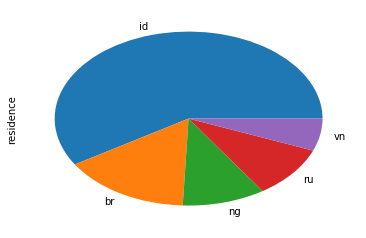

In [123]:

%matplotlib inline
df_client["residence"].value_counts()[:5].plot(kind="pie")

# Conclusion

In the dataset, clients, transactions, and campaigns are totally biased. The country "id" has the most number of rows in all databases. As we can see in the last created tables, the most successful campaigns are also in "id".
The fact, "br" has the second number of population and also second best campaigns could support this assumption.
Maybe, there is more insight in countries in which we have more clients. So, for better performance, the more could be gained in countries with more clients. 
In countries with lower client size, campaigns could target to subscribe to users and make the market bigger for future earnings. 